
<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    <strong>Exercise Session 5 - Path Planning<br/> Duration : 4 hours (2 in session + 2 at home)</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">How to use this notebook?</span><br/>
    This notebook is made of text cells and code cells. The code cells have to be <strong>executed</strong> to see the result of the program. To execute a cell, simply select it and click on the "play" button (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) in the tool bar just above the notebook, or type <code>shift + enter</code>. It is important to execute the code cells in their order of appearance in the notebook.<br/>
You can make use of the table of contents to navigate easily between sections.
</div>

<br/>

<div style="justify;text-justify: inter-word">
So that you may familiarise with the notebooks and the basic python syntax, the exercises are provided in notebook form and whenever there are any calculations to be made, we encourage you to do them by code. Also, if you want to take notes, we encourage you to use the markdown or Raw NBConvert cells. 
</div>

---

# Learning Goals

- Understand path planning algorithms conceptually and on paper.
- Implement and compare path planning algorithms (A* and Dijkstra) in terms of efficiency and performance.

# Requirements

- The printed ``grid1.pdf`` on paper. 

<img src="Images/grid1.png" alt="gradient" width="300"/>


# Understanding Path Planning on **Paper**

For the paper based algorithms, you will need the files located in the Paper folder : 

- ``grid1.pdf` for the Dijkstra and A* algorithms on paper. 


## Dijkstra's Algorithm

Apply the Dijkstra’s algorithm on **paper** on the map of the Figure below using a Manhattan distance.

<img src="Images/grid1.png" alt="gradient" width="300"/>



# Understanding Path Planning on Paper

For the paper based algorithms, you will need the files located in the Paper folder : 

- ``grid1.pdf`` or `grid-path-planning.xlsx` for the Dijkstra and A* algorithms depending on whether you prefer working on a spreadsheet or on paper. 


## Introduction to path planning

Once a robot has a map, it is essential to be able to plan a path to go from one point to another. The techniques used to find the best path depend on the type of map and of the type of path that one wants to obtain. In many cases, the maps are transformed into graphs and the path search is transformed in a graph search.


## Dijkstra's Algorithm

Apply the Dijkstra’s algorithm on paper on the map of the Figure below using a Manhattan distance.


<img src="Images/grid1.png" alt="gradient" width="300"/>

<span style="color: #2980B9 ;">

> The solution is provided in the image below. <br>
<img src="Images/grid-plan.png" alt="gradient" width="600"/>

## A* Algorithm

Apply the A* algorithm on paper on the map of the previous exercise using a Manhattan distance from the source for the motion cost and the Manhattan distance to the goal (without obstacles) as heuristic function. The same excel file as for the previous exercice can be used here.

<span style="color: #2980B9 ;">

> The solution for the <strong> extra </strong> exercise is given in the image below, presenting both the cost function and the heuristic function and their sum. The A* algorithm allows to reduce the number of evaluated cell, at a cost of a higher computation for each cell. If the heuristic function is simple the A* algorithm is more efficient than Dijkstra’s algorithm. <br><br>
> a) Heuristic function. b) The first two iterations of the A algorithm


<img src="images/astar_corr.png" alt="gg" width="600"/>

> c) The A* algorithm after 6 steps. d) The A* algorithm reaches the goal cell and finds a shortest path

<img src="images/astar-corr_1.png" alt="gg" width="600"/>




<span style="color: #2980B9 ;">

> If you want a reminder from the course slides of the pseudocode for the **Dijkstra algorithm with constant weights** (equivalent to Breadth-First Search), we have included it at the bottom of this exercise.


## Implementation the Dijkstra algorithm (with weight)
### Initial Map 

We first choose an environment for the grid map with <span style="color:green"><strong>S  </strong></span> (Source/Start in green), <span style="color:red">  <strong>G  </strong></span> (Goal in red), and <span style="color:black"><strong>obstacles  </strong></span> (in black), as shown below. Morever we put weight on a cell (in <span style="color: yellow"><strong>yellow</strong></span>) (representing areas that slow down movement along the path, ex: sand, etc.) 


<img src="Images/initial_map_with_cost.png" alt="gradient" width="200"/>


Initial Map (0: free, -1: obstacle, 2: weighted cell):
[[-1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0. -1. -1. -1. -1. -1.]
 [-1.  0.  0.  2. -1. -1. -1. -1. -1.]
 [-1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1. -1.  0.  0.  0.  0.  0.  0. -1.]
 [-1. -1. -1.  0.  0.  0.  0.  0. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.]]


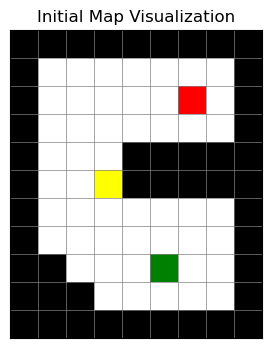

In [2]:
##############################################
#do not modify this code
##############################################
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from heapq import heappush, heappop # used if you want to use heap queue for priority queue (easier to implement) but not compulsory

def display_map(map_grid, path, start, goal, explored):
    cmap = ListedColormap(['white', 'black', 'blue', 'green', 'red', 'grey', 'yellow'])
    map_display = np.zeros_like(map_grid, dtype=object)

    # Assign colors based on the map grid values
    map_display[map_grid == -1] = 'black'  # Obstacles
    map_display[map_grid == 0] = 'white'   # Free space

    for position in explored:
        if map_display[tuple(position)] == 'white':
            map_display[tuple(position)] = 'grey'  # Explored cells

    # Visualize the path
    for position in path:
        if map_display[position[0], position[1]] in ['white', 'grey']:
            map_display[position[0], position[1]] = 'blue'  # Path

    map_display[map_grid > 0] = 'yellow'  # Obstacles
    map_display[start[0], start[1]] = 'green'  # Start
    map_display[goal[0], goal[1]] = 'red'      # Goal

    # Convert color names to numbers for plotting
    color_mapping = {'white': 0, 'black': 1, 'blue': 2, 'green': 3, 'red': 4, 'grey': 5, 'yellow': 6}
    map_numeric_display = np.vectorize(color_mapping.get)(map_display)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(map_numeric_display, cmap=cmap)
    ax.set_xticks(np.arange(-0.5, map_grid.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, map_grid.shape[0], 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_title(f'{ALGO} Visualization')
    plt.show()
##############################################
#end of code not to modify
##############################################
Map = np.zeros((11, 9))

Map[5, 3] = 2; # Weighted cell

Map[0, :] = -1; Map[10, :] = -1; Map[:, 0] = -1; Map[:, 8] = -1
Map[8, 1] = -1; Map[9, 1] = -1; Map[9, 2] = -1; Map[4:6, 4:8] = -1
SearchStart = (8, 5) 
SearchGoal  = (2, 6)
print("Initial Map (0: free, -1: obstacle, 2: weighted cell):")
print(Map)
ALGO = "Initial Map"
display_map(Map, [], SearchStart, SearchGoal, [])


> We recommend starting with the **4-connected grid** (Manhattan distance) and **not** the 8-connected grid (which includes diagonals) for now.

<img src="Images/Square_4_connectivity-1.png" alt="gradient" width="150"/>
<img src="Images/Square_8_connectivity.png" alt="gradient" width="150"/>



**Implement the dijkstra algorithm**. You can use the code the hinted code below. 
We choose to use a priority queue to always expand the node with the lowest cost first. 
We use heapq library. 

Suggestion initialise with 
- came_from = {}
- g_costs = {S: 0}, 
- explored = set()

- open_set = ...

(What are all these variables ?)


<span style="color: #2980B9 ;">

> - came_from → how we got there (for reconstructing the path)
> - g_costs →   current shortest known distance to each cell <br>
> - explored →  what we’ve already checked (for visualization / tracking)
> - open_set →  what we still need to explore (sorted by cost)



Dijkstra path length = 13 
 [(8, 5), (7, 5), (6, 5), (6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)]
length explored: 48
Dijkstra visualization


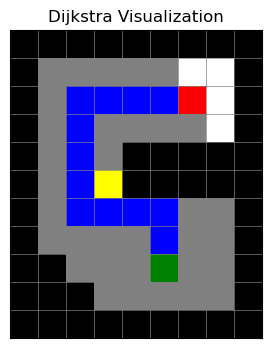

A* path length = 13 
 [(8, 5), (7, 5), (6, 5), (6, 4), (6, 3), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6)]
length explored: 37
A* visualization


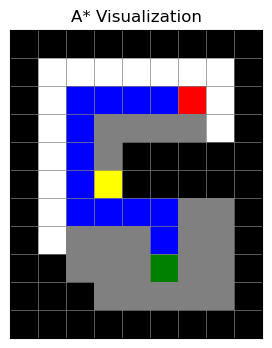

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappush, heappop

algo = "A*"  # Change to "A*" to test A* algorithm

def grid_search(map_grid, S, G, algo="Dijkstra"):
    
    ## initialize the varibales above
    came_from = {}      # to reconstruct path
    g_costs = {S: 0}    # cost from start to the cell
    explored = set()    # to keep track of explored cells
    operation_count = 0 # to count the number of operations
    if algo == "Dijkstra":
        open_set = [(0, S)]  # priority queue for Dijkstra (cost, position)
        #heappush(open_set, (0, S))
    if algo == "A*":
        open_set = [(heuristic(S, G), 0, S)]  # priority queue for A* (f_cost, g_cost, position)
        
    while open_set: # G goal is unmarked
        if algo == "Dijkstra":
            current_g_cost, current_pos = heappop(open_set)
        if algo == "A*":
            current_f_cost, current_g_cost, current_pos = heappop(open_set)

        explored.add(current_pos)
        
        if current_pos == G: # if G goal is marked
            break

        # Get neighbors (up, down, left, right)
        neighbors = [
            (current_pos[0]-1, current_pos[1]),  # Up
            (current_pos[0]+1, current_pos[1]),  # Down
            (current_pos[0], current_pos[1]-1),  # Left
            (current_pos[0], current_pos[1]+1)   # Right
        ]

        for neighbor in neighbors: # for each neighbor of marked cells
            # Check if neighbor is within bounds
            if (0 <= neighbor[0] < map_grid.shape[0]) and (0 <= neighbor[1] < map_grid.shape[1]): #check if the neighbor is less than 1 and greater than 0
                # Check if neighbor is not an obstacle
                if map_grid[neighbor[0], neighbor[1]] != -1:
                    tentative_g_cost = current_g_cost + 1  + map_grid[neighbor[0], neighbor[1]]

                    if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                        g_costs[neighbor] = tentative_g_cost
                        came_from[neighbor] = current_pos
                        operation_count += 1 
                        if algo == "Dijkstra":
                            heappush(open_set, (tentative_g_cost, neighbor))

                        if algo == "A*":
                            f_cost = tentative_g_cost + heuristic(neighbor, G)
                            heappush(open_set, (f_cost, tentative_g_cost, neighbor))
                        
    # Reconstruct path
    if current_pos == G:
        path = []
        while current_pos != S:
            path.append(current_pos)
            current_pos = came_from[current_pos]
        path.append(S)
        path.reverse()
        return path, explored, operation_count  # Return reversed path and explored cells
    else:
    # If we reach here, no path was found
        return None, explored, operation_count

##############################################
#do not modify this code
##############################################
# Dijkstra
path, explored, operation_count = grid_search(Map, SearchStart, SearchGoal, algo="Dijkstra")
if path:
    print("Dijkstra path length =", len(path)-1, "\n", path)
    print("length explored:", len(explored))
    print("Dijkstra visualization")
    ALGO = "Dijkstra"
    display_map(Map, path, SearchStart, SearchGoal, explored)
else:
    print("No path found with Dijkstra")

# A*
#uncomment the lines below to test A* algorithm
if algo == "A*":
    ALGO = "A*"
    path, explored, operation_count = grid_search(Map, SearchStart, SearchGoal, algo="A*")
if path and algo == "A*":
    print("A* path length =", len(path)-1, "\n", path)
    print("length explored:", len(explored))
    print("A* visualization")
    display_map(Map, path, SearchStart, SearchGoal, explored)
else:
    print("No path found with A*")


## Implemententing the A* Algorithm
In the same way, let's implement the A* algorithm.

> Note that the A* algorithm is an extension of the Dijkstra algorithm. 
- What is the main difference?

**Reuse** the Dijksta alogrithm above and add the things for A* algorithm (remove some comments if needed).


In [6]:
def heuristic(a, b):
    # Implement the Manhattan distance heuristic
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


## Comparison of Dijkstra's Algorithm and A* Algorithm

Try different aspects and compare the results of the 2 algo in terms of path length, number of operations, and visited cells..

- Different costs assigned to the cells (highlighted in yellow)
- Alternative heuristic functions (such as Euclidean distance) in an 8-connected grid
- Comparison of the number of operations and visited cells for each algorithm
- what is the limits of A* ?

<span style="color: #2980B9 ;">


- **Efficiency:** A* with an appropriate heuristic is generally more efficient than Dijkstra's Algorithm because it uses heuristics to guide the search towards the goal, reducing the number of visited cells.
- **Heuristic Impact:** The choice of heuristic affects the performance of the A* algorithm.
A heuristic that closely estimates the actual cost to reach the goal can significantly reduce the number of operations.
- **Path Cost:** All algorithms find the optimal path in terms of total cost unless the heuristic used is **not admissible** (overestimates the cost).


---
---

# Recall of Dikstra Algorithm with constant weights (~ Breadth-First Search [BFS])

Here is the pseudocode for the Dijkstra algorithm (Basic ~ Breaddth-First Search) : 

<img src="Images/pseudo.png" alt="gradient" width="450"/>

In [ ]:
""" pseudocode for Dijkstra's algorithm in text form

integer n ← 0                  # Distance from start
cell array grid ← all unmarked # Grid map
cell list path ← empty         # Shortest path
cell current                   # Current cell in path
cell c                         # Index over cells
cell S ← ...                   # Source cell
cell G ← ...                   # Goal cell

mark S with n
while G is unmarked
    n ← n + 1
    for each unmarked neighbor (c) of the current frontier cells explored.
        mark c with n

current ← G
append current to path
while S not in path
    append lowest marked neighbor c of current to path
    current ← c
"""